In [1]:
import pandas as pd
import json 
import openpyxl
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [2]:
df_laliga_2016y17 = pd.read_csv('espana-master/2010s/2016-17/es.1.csv')
new = df_laliga_2016y17['FT'].str.split('-',n=1,expand=True)
df_laliga_2016y17['GolesLocal']=new[0]
df_laliga_2016y17['GolesVisitante']=new[1]
df_laliga_2016y17

,Round,Date,Team 1,FT,Team 2,GolesLocal,GolesVisitante
0,1,Fri Aug 19 2016,Málaga CF,1-1,CA Osasuna,1,1
1,1,Fri Aug 19 2016,RCD La Coruña,2-1,SD Eibar,2,1
2,1,Sat Aug 20 2016,FC Barcelona,6-2,Real Betis,6,2
3,1,Sat Aug 20 2016,Granada CF,1-1,Villarreal CF,1,1
4,1,Sat Aug 20 2016,Sevilla FC,6-4,RCD Espanyol,6,4
...,...,...,...,...,...,...,...
375,38,Sun May 21 2017,RC Celta Vigo,2-2,Real Sociedad,2,2
376,38,Sun May 21 2017,Valencia CF,1-3,Villarreal CF,1,3
377,38,Sun May 21 2017,Atlético Madrid,3-1,Athletic Club Bilbao,3,1
378,38,Sun May 21 2017,FC Barcelona,4-2,SD Eibar,4,2


In [3]:
df_laliga_2016y17['GolesLocal']=pd.to_numeric(df_laliga_2016y17['GolesLocal'], downcast="float")
df_laliga_2016y17['GolesVisitante']=pd.to_numeric(df_laliga_2016y17['GolesVisitante'], downcast="float")
df_laliga_2016y17['TotalGolesPartido'] = df_laliga_2016y17['GolesLocal']+df_laliga_2016y17['GolesVisitante']
df_laliga_2016y17

,Round,Date,Team 1,FT,Team 2,GolesLocal,GolesVisitante,TotalGolesPartido
0,1,Fri Aug 19 2016,Málaga CF,1-1,CA Osasuna,1.0,1.0,2.0
1,1,Fri Aug 19 2016,RCD La Coruña,2-1,SD Eibar,2.0,1.0,3.0
2,1,Sat Aug 20 2016,FC Barcelona,6-2,Real Betis,6.0,2.0,8.0
3,1,Sat Aug 20 2016,Granada CF,1-1,Villarreal CF,1.0,1.0,2.0
4,1,Sat Aug 20 2016,Sevilla FC,6-4,RCD Espanyol,6.0,4.0,10.0
...,...,...,...,...,...,...,...,...
375,38,Sun May 21 2017,RC Celta Vigo,2-2,Real Sociedad,2.0,2.0,4.0
376,38,Sun May 21 2017,Valencia CF,1-3,Villarreal CF,1.0,3.0,4.0
377,38,Sun May 21 2017,Atlético Madrid,3-1,Athletic Club Bilbao,3.0,1.0,4.0
378,38,Sun May 21 2017,FC Barcelona,4-2,SD Eibar,4.0,2.0,6.0


In [4]:
df_laliga_2016y17['TotalGolesPartido'].sum()

1118.0

In [5]:
RealMadridL_5 = df_laliga_2016y17.loc[df_laliga_2016y17['Team 1'] == 'Real Madrid', ['GolesLocal']]
RealMadridL_5.reset_index(inplace=True)

RealMadridL_5

,index,GolesLocal
0,14,2.0
1,22,5.0
2,42,1.0
3,66,1.0
4,89,2.0
5,105,3.0
6,122,2.0
7,144,3.0
8,160,5.0
9,181,2.0


In [6]:
RealMadridV_5 = df_laliga_2016y17.loc[df_laliga_2016y17['Team 2'] == 'Real Madrid', ['GolesVisitante']]
RealMadridV_5.reset_index(inplace=True)

RealMadridV_5

,index,GolesVisitante
0,6,3.0
1,38,2.0
2,54,2.0
3,74,6.0
4,92,4.0
5,114,3.0
6,131,1.0
7,177,1.0
8,211,3.0
9,227,1.0


In [7]:
Madrid_Tot_5=pd.merge(RealMadridL_5, RealMadridV_5, left_index=True, right_index=True)
Madrid_Tot_5

,index_x,GolesLocal,index_y,GolesVisitante
0,14,2.0,6,3.0
1,22,5.0,38,2.0
2,42,1.0,54,2.0
3,66,1.0,74,6.0
4,89,2.0,92,4.0
5,105,3.0,114,3.0
6,122,2.0,131,1.0
7,144,3.0,177,1.0
8,160,5.0,211,3.0
9,181,2.0,227,1.0


In [8]:
Madrid_Tot_5['GolesTotales']=Madrid_Tot_5['GolesLocal']+Madrid_Tot_5['GolesVisitante']
Madrid_Tot_5

,index_x,GolesLocal,index_y,GolesVisitante,GolesTotales
0,14,2.0,6,3.0,5.0
1,22,5.0,38,2.0,7.0
2,42,1.0,54,2.0,3.0
3,66,1.0,74,6.0,7.0
4,89,2.0,92,4.0,6.0
5,105,3.0,114,3.0,6.0
6,122,2.0,131,1.0,3.0
7,144,3.0,177,1.0,4.0
8,160,5.0,211,3.0,8.0
9,181,2.0,227,1.0,3.0


In [9]:
Madrid_Tot_5['GolesLocal'].describe()

count    19.000000
mean      2.526316
std       1.172292
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: GolesLocal, dtype: float64

In [10]:
Madrid_Tot_5['GolesLocal'].sum()

48.0

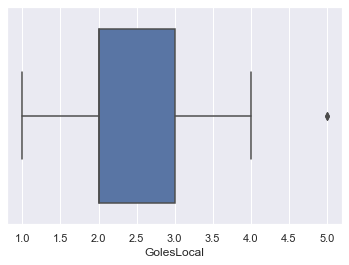

In [11]:
sns.boxplot(x=Madrid_Tot_5['GolesLocal'])
plt.show()

In [12]:
Madrid_Tot_5['GolesVisitante'].describe()

count    19.000000
mean      3.052632
std       1.470967
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       6.000000
Name: GolesVisitante, dtype: float64

In [13]:
Madrid_Tot_5['GolesVisitante'].sum()

58.0

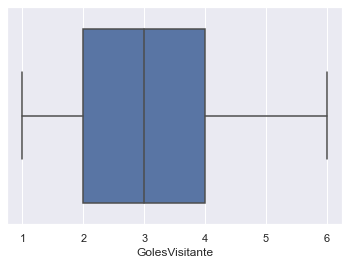

In [14]:
sns.boxplot(x=Madrid_Tot_5['GolesVisitante'])
plt.show()

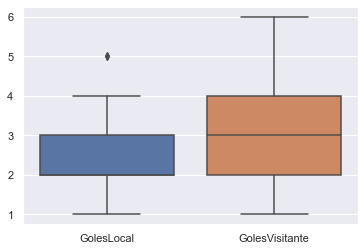

In [15]:
sns.boxplot(data=Madrid_Tot_5.loc[:, ['GolesLocal', 'GolesVisitante']])
plt.show()

In [ ]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_5['GolesLocal'],kde=False, label='Madrid como local')
sns.distplot(Madrid_Tot_5['GolesVisitante'],kde=False, label='Madrid como visitante')
plt.title("2016-17 Madrid local vs Madrid visitante")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


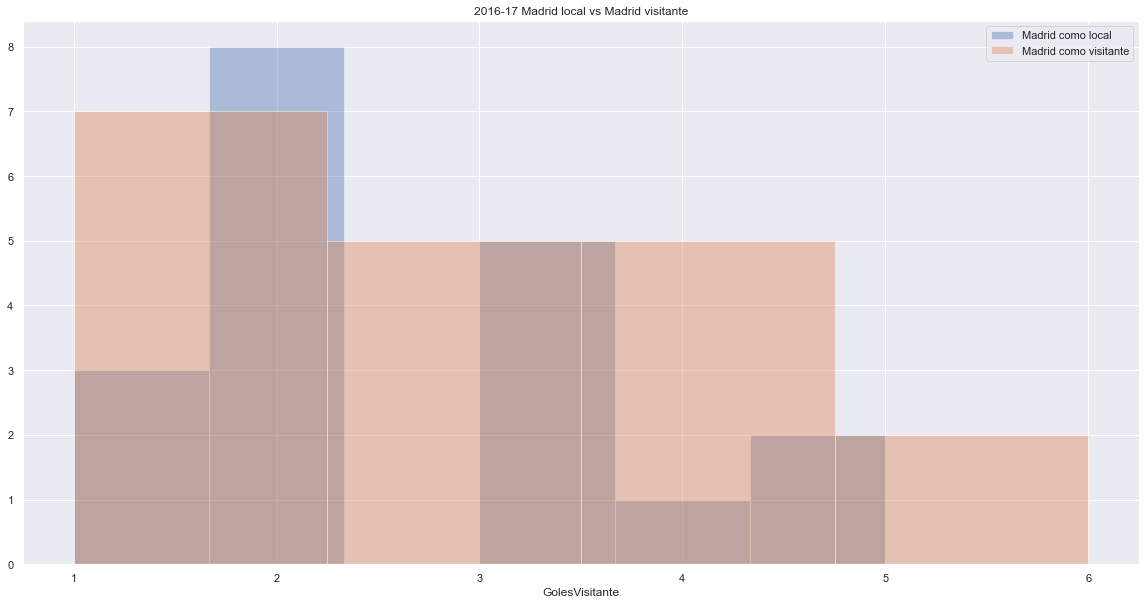

In [16]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_5['GolesLocal'],kde=False, label='Madrid como local')
sns.distplot(Madrid_Tot_5['GolesVisitante'],kde=False, label='Madrid como visitante')
plt.title("2016-17 Madrid local vs Madrid visitante")
plt.legend()

Text(0.5, 1.0, '2016-17 Madrid local vs Madrid visitante')

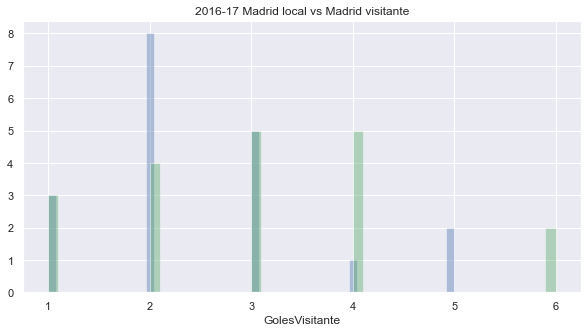

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(Madrid_Tot_5['GolesLocal'],
             kde=False,
             color='b',
             bins=50);
sns.distplot(Madrid_Tot_5['GolesVisitante'],
             kde=False,
             color='g',
             bins=50);
plt.title("2016-17 Madrid local vs Madrid visitante")

In [19]:
BarsaL_5 = df_laliga_2016y17.loc[df_laliga_2016y17['Team 1'] == 'FC Barcelona', ['GolesLocal']]
BarsaL_5.reset_index(inplace=True)
BarsaL_5

,index,GolesLocal
0,2,6.0
1,25,1.0
2,46,1.0
3,72,4.0
4,94,1.0
5,112,0.0
6,131,1.0
7,157,4.0
8,170,5.0
9,200,3.0


In [20]:
BarsaV_5 = df_laliga_2016y17.loc[df_laliga_2016y17['Team 2'] == 'FC Barcelona', ['GolesVisitante']]
BarsaV_5.reset_index(inplace=True)
BarsaV_5

,index,GolesVisitante
0,18,1.0
1,31,5.0
2,52,5.0
3,69,3.0
4,82,3.0
5,109,2.0
6,128,1.0
7,141,3.0
8,167,1.0
9,188,4.0


In [44]:
BarsaTot_5=pd.merge(BarsaL_5, BarsaV_5, left_index=True, right_index=True)
BarsaTot_5['GolesTotales']=BarsaTot_5['GolesLocal']+BarsaTot_5['GolesVisitante']
BarsaTot_5

,index_x,GolesLocal,index_y,GolesVisitante,GolesTotales
0,2,6.0,18,1.0,7.0
1,25,1.0,31,5.0,6.0
2,46,1.0,52,5.0,6.0
3,72,4.0,69,3.0,7.0
4,94,1.0,82,3.0,4.0
5,112,0.0,109,2.0,2.0
6,131,1.0,128,1.0,2.0
7,157,4.0,141,3.0,7.0
8,170,5.0,167,1.0,6.0
9,200,3.0,188,4.0,7.0


In [22]:
BarsaTot_5['GolesLocal'].sum()

64.0

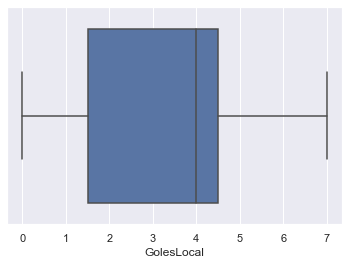

In [23]:
sns.boxplot(x=BarsaTot_5['GolesLocal'])
plt.show()

In [24]:
BarsaTot_5['GolesVisitante'].sum()

52.0

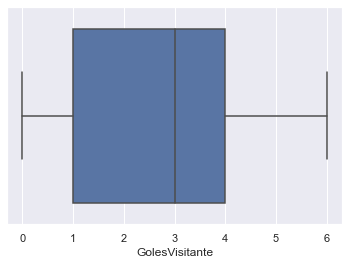

In [25]:
sns.boxplot(x=BarsaTot_5['GolesVisitante'])
plt.show()

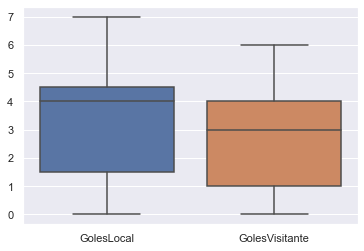

In [41]:
sns.boxplot(data=BarsaTot_5.loc[:, ['GolesLocal', 'GolesVisitante']])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


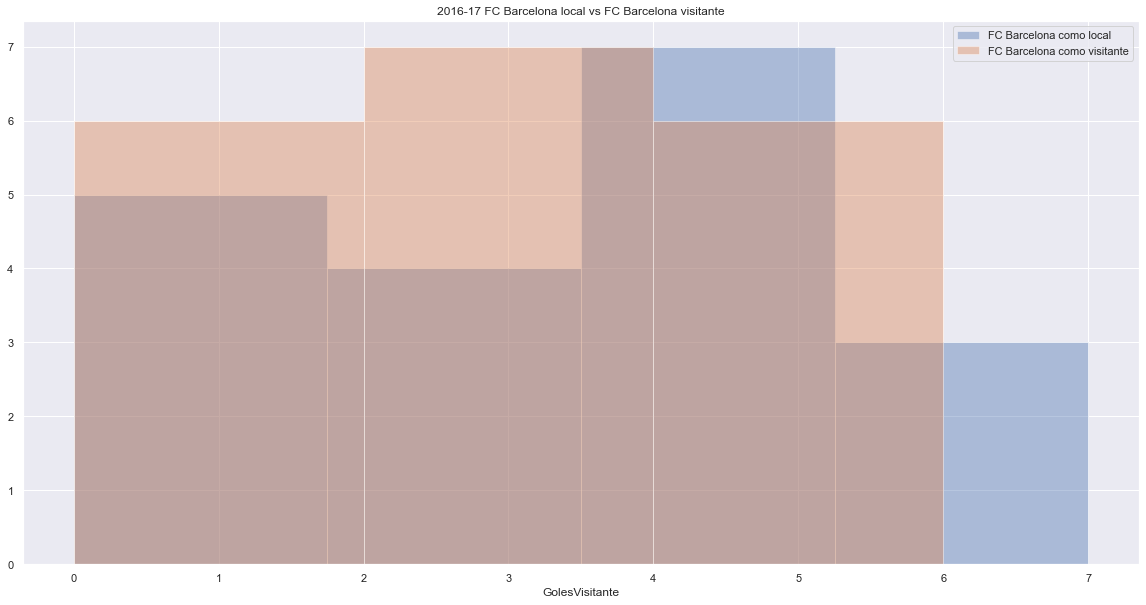

In [27]:
plt.figure(figsize = (20,10))
sns.distplot(BarsaTot_5['GolesLocal'],kde=False, label='FC Barcelona como local')
sns.distplot(BarsaTot_5['GolesVisitante'],kde=False, label='FC Barcelona como visitante')
plt.title("2016-17 FC Barcelona local vs FC Barcelona visitante")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2016-17 FC Barcelona local vs FC Barcelona visitante')

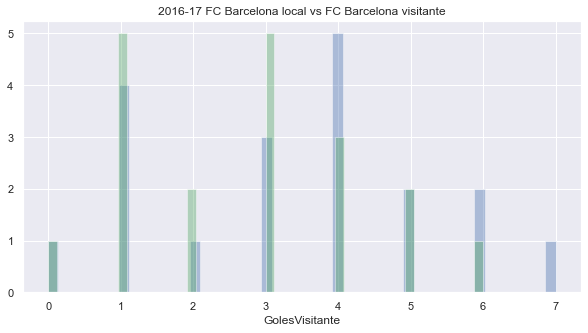

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(BarsaTot_5['GolesLocal'],
             kde=False,
             color='b',
             bins=50);
sns.distplot(BarsaTot_5['GolesVisitante'],
             kde=False,
             color='g',
             bins=50);
plt.title("2016-17 FC Barcelona local vs FC Barcelona visitante")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


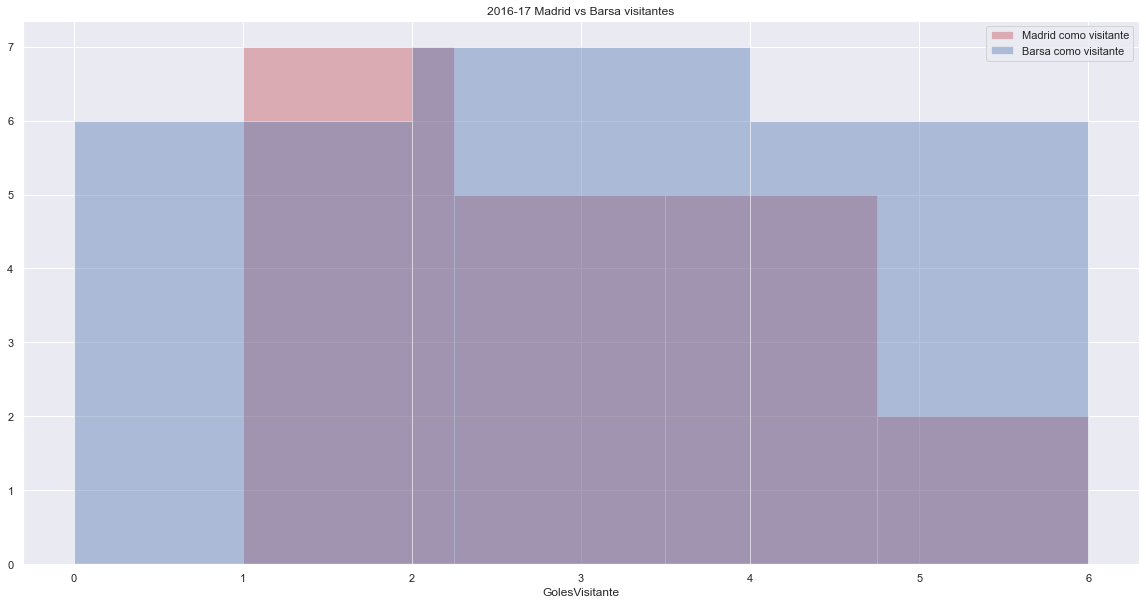

In [29]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_5['GolesVisitante'],kde=False,color='r', label='Madrid como visitante')
sns.distplot(BarsaTot_5['GolesVisitante'],kde=False,color='b', label='Barsa como visitante')
plt.title("2016-17 Madrid vs Barsa visitantes")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


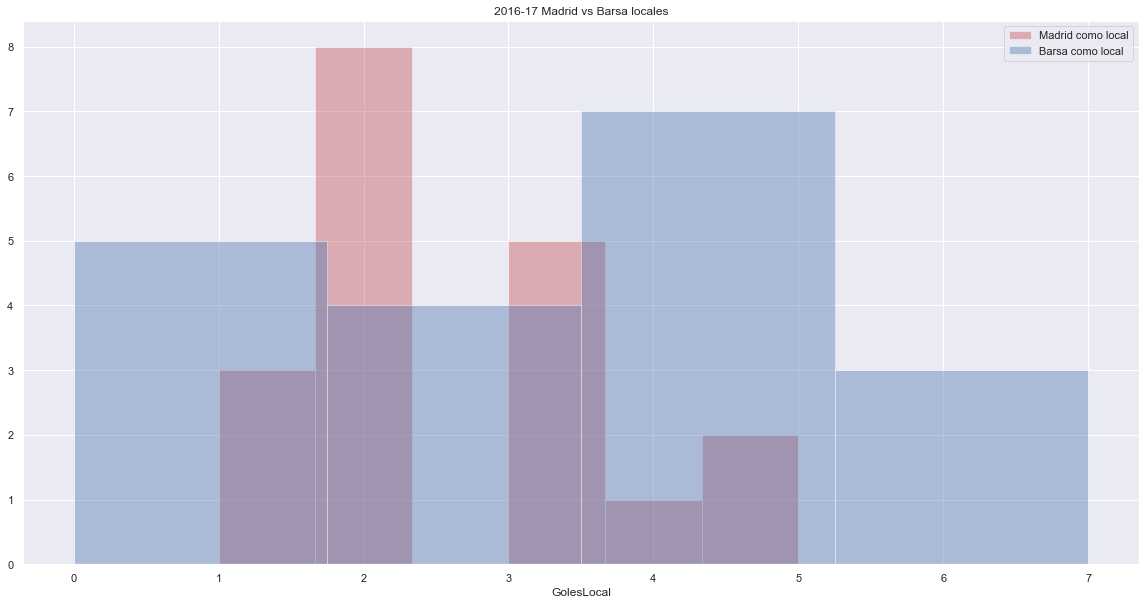

In [30]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_5['GolesLocal'],kde=False,color='r', label='Madrid como local')
sns.distplot(BarsaTot_5['GolesLocal'],kde=False,color='b', label='Barsa como local')
plt.title("2016-17 Madrid vs Barsa locales")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


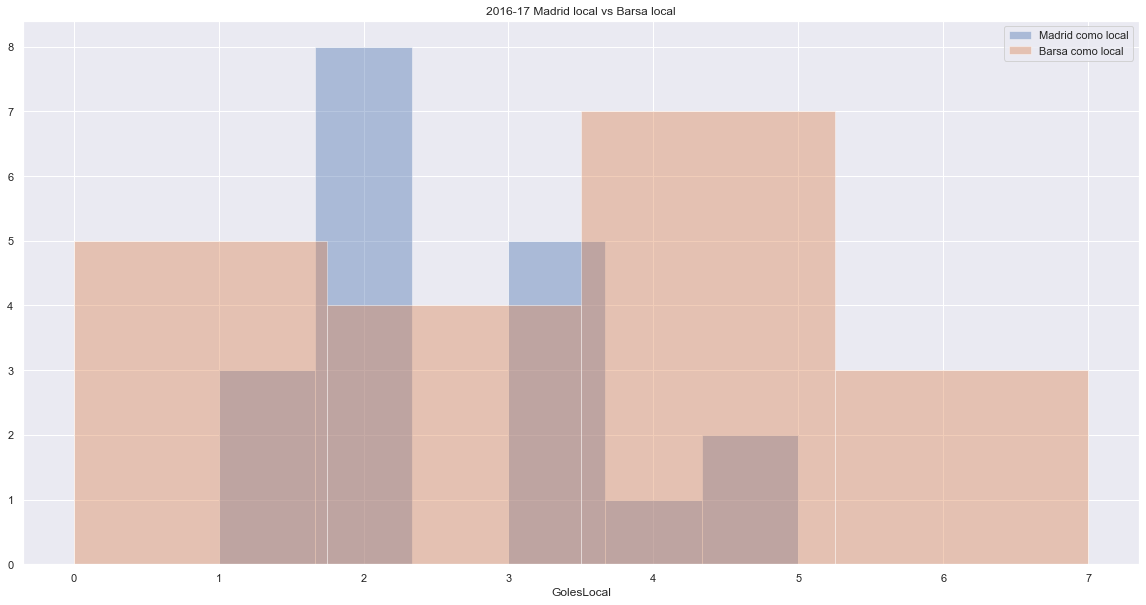

In [37]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_5['GolesLocal'],kde=False, label='Madrid como local')
sns.distplot(BarsaTot_5['GolesLocal'],kde=False, label='Barsa como local')
plt.title("2016-17 Madrid local vs Barsa local")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2016-17 Partidos x número de goles')

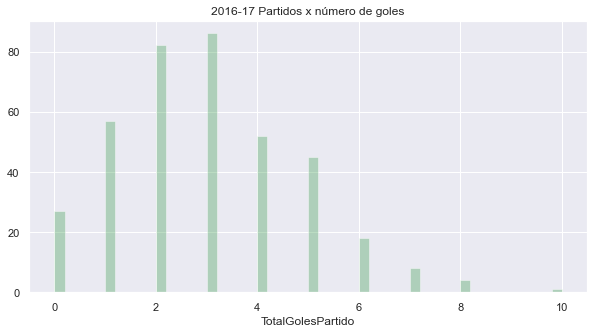

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(df_laliga_2016y17['TotalGolesPartido'],
             kde=False,
             color='g',
             bins=50);
plt.title("2016-17 Partidos x número de goles")

Text(0.5, 1.0, '2016-17 Equipos de LaLiga goles como Locales')

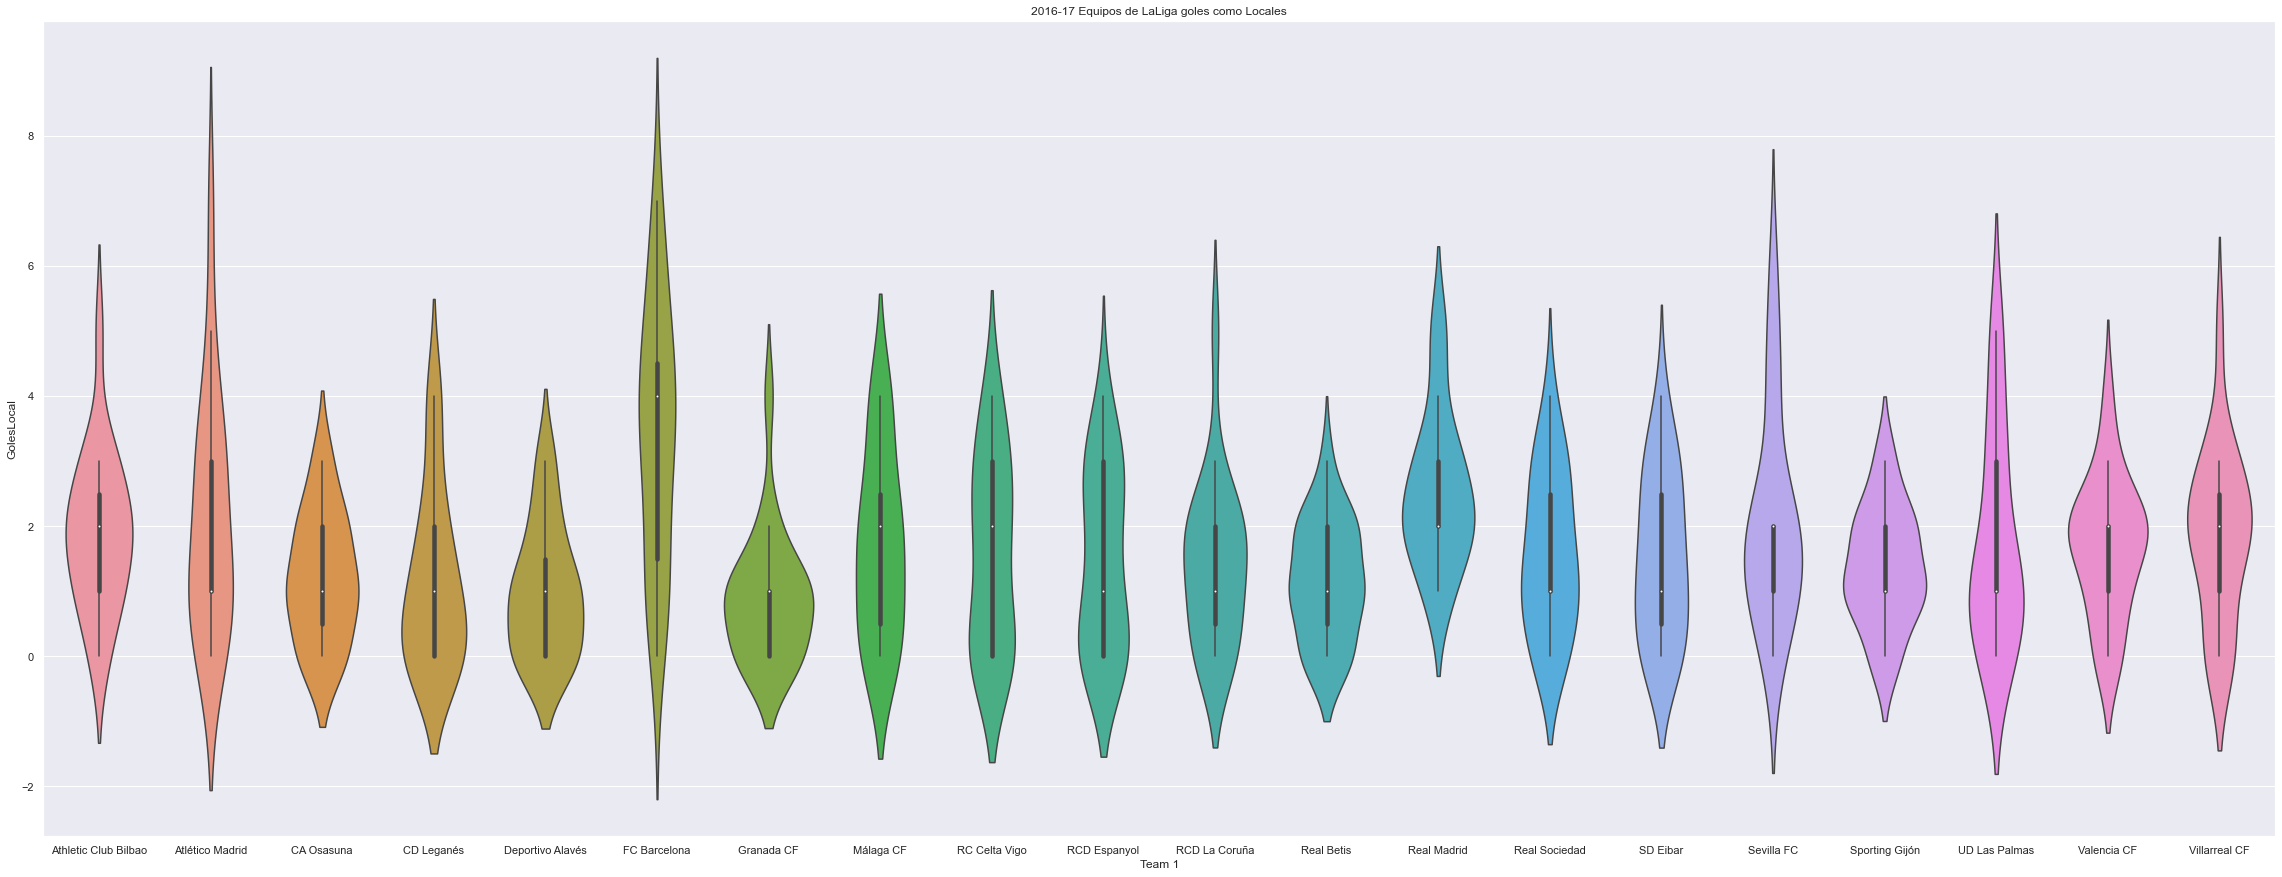

In [35]:
plt.figure(figsize=(40,15))
sns.violinplot(x=df_laliga_2016y17['Team 1'].sort_values(), y=df_laliga_2016y17['GolesLocal'])
plt.title("2016-17 Equipos de LaLiga goles como Locales")

Text(0.5, 1.0, '2016-17 Equipos de LaLiga goles como Visitantes')

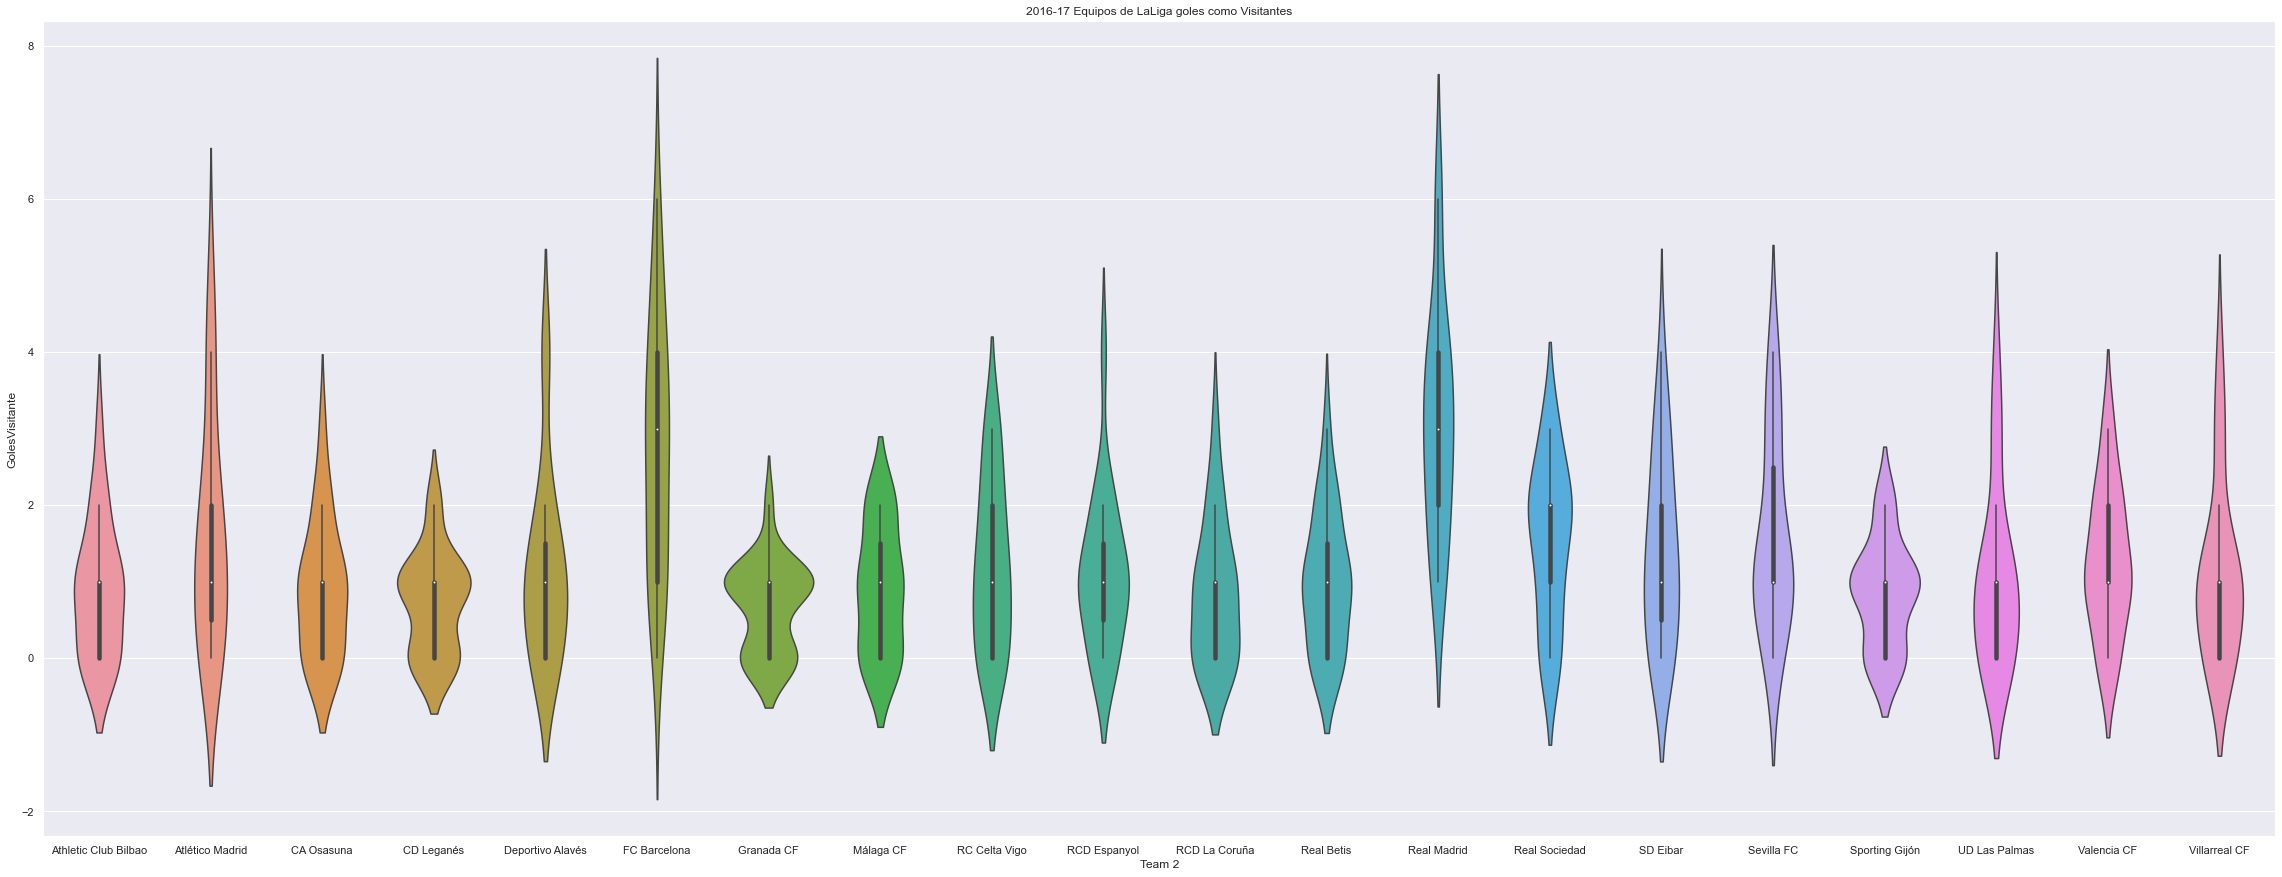

In [36]:
plt.figure(figsize=(40,15))
sns.violinplot(x=df_laliga_2016y17['Team 2'].sort_values(), y=df_laliga_2016y17['GolesVisitante'])
plt.title("2016-17 Equipos de LaLiga goles como Visitantes")

Ganador del campeonato Real Madrid CF

In [42]:
Madrid_Tot_5['GolesTotales'].sum()

106.0

In [45]:
BarsaTot_5['GolesTotales'].sum()

116.0